In [1]:
import math
import random
from utils import *
from models import *

In [2]:
df = load_data_par_row("Dataset1.csv",columns = ["N","P","K","pH","EC","OC","S","Zn","Fe","Cu","Mn","B","OM","Fertility"],
                       col_type = [float,float,float,float,float,float,float,float,float,float,float,float,float,int])

In [3]:
df

[['N',
  'P',
  'K',
  'pH',
  'EC',
  'OC',
  'S',
  'Zn',
  'Fe',
  'Cu',
  'Mn',
  'B',
  'OM',
  'Fertility'],
 [138.0,
  8.6,
  560.0,
  7.46,
  0.62,
  0.7,
  5.9,
  0.24,
  0.31,
  0.77,
  8.71,
  0.11,
  1.204,
  0],
 [213.0,
  7.5,
  338.0,
  7.62,
  0.75,
  1.06,
  25.4,
  0.3,
  0.86,
  1.54,
  2.89,
  2.29,
  1.8232,
  0],
 [163.0,
  9.6,
  718.0,
  7.59,
  0.51,
  1.11,
  14.3,
  0.3,
  0.86,
  1.57,
  2.7,
  2.03,
  1.9092,
  0],
 [157.0,
  6.8,
  475.0,
  7.64,
  0.58,
  0.94,
  26.0,
  0.34,
  0.54,
  1.53,
  2.65,
  1.82,
  1.6168,
  0],
 [270.0,
  9.9,
  444.0,
  7.63,
  0.4,
  0.86,
  11.8,
  0.25,
  0.76,
  1.69,
  2.43,
  2.26,
  1.4792,
  1],
 [220.0,
  8.6,
  444.0,
  7.43,
  0.65,
  0.72,
  11.7,
  0.37,
  0.66,
  0.9,
  2.19,
  1.82,
  1.2384,
  0],
 [220.0,
  7.2,
  222.0,
  7.62,
  0.43,
  0.81,
  7.4,
  0.34,
  0.69,
  1.05,
  2.0,
  1.88,
  1.3932,
  0],
 [207.0,
  7.0,
  401.0,
  7.63,
  0.59,
  0.69,
  7.6,
  0.32,
  0.68,
  0.62,
  2.43,
  1.68,
  1.1868

In [4]:
fixWithMean(df)

In [5]:
fixAbb(df)

In [6]:
df = remove_hozizontale(df)

In [7]:
df = normHist(df,plot=False,do_not=[13])

In [8]:
df_train ,df_test,x_train,x_test,y_train,y_test = train_test_split(df,seed=10)

In [9]:
model = DTree(df_train,'Fertility',spacing=1,min_leaf_size=1,max_depth=100,mode=1)

In [10]:
y_pred_train = model.predict_all(df_train)

In [11]:
y_pred = model.predict_all(df_test)

In [12]:
len(x_test)

176

In [13]:
y_train = [i[-1] for i in df_train[1:]]

In [14]:
y_test

[0,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 1]

In [15]:
eval = Evaluator(y_train,y_pred_train,[0,1,2])
eval.report()

Report:
        recall     precision   f1-score     specificity
  0      93.10       93.99       93.54        72.86
  1      94.41       93.37       93.89        93.10
  2      93.10       96.43       94.74        99.69
accuracy : 0.9376770538243626
Confusion Matrix : 
[297, 22, 0]
[19, 338, 1]
[0, 2, 27]


In [16]:
eval = Evaluator(y_test,y_pred,[0,1,2])
eval.report()

Report:
        recall     precision   f1-score     specificity
  0      73.17       67.42       70.18        50.85
  1      61.45       63.75       62.58        68.82
  2      00.00       00.00       00.00        92.93
accuracy : 0.6306818181818182
Confusion Matrix : 
[60, 21, 1]
[26, 51, 6]
[3, 8, 0]


In [17]:
knn = KNN(df_train)
y_pred = knn.predict_all(x_test)
eval = Evaluator(y_test,y_pred,[0,1,2])
eval.report()

Report:
        recall     precision   f1-score     specificity
  0      70.73       70.73       70.73        58.62
  1      69.88       66.67       68.24        68.82
  2      18.18       28.57       22.22        94.62
accuracy : 0.6704545454545454
Confusion Matrix : 
[58, 21, 3]
[23, 58, 2]
[1, 8, 2]


In [18]:
rf = RandomForest(df_train,'Fertility',start_with_att=10,max_depth=30,n_estimators=5,spacing=0.5,min_leaf_size=1,mode=1)
y_pred_train = rf.predict_all(df_train)
eval = Evaluator(y_train,y_pred_train,[0,1,2])
eval.report()
y_pred = rf.predict_all(df_test)
eval = Evaluator(y_test,y_pred,[0,1,2])
eval.report()


Report:
        recall     precision   f1-score     specificity
  0      94.04       95.24       94.64        75.81
  1      96.09       93.22       94.64        92.82
  2      75.86       100.00       86.27        100.00
accuracy : 0.943342776203966
Confusion Matrix : 
[300, 19, 0]
[14, 344, 0]
[1, 6, 22]
Report:
        recall     precision   f1-score     specificity
  0      62.20       63.75       62.96        57.97
  1      67.47       58.95       62.92        58.06
  2      09.09       100.00       16.67        100.00
accuracy : 0.6136363636363636
Confusion Matrix : 
[51, 31, 0]
[27, 56, 0]
[2, 8, 1]


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [20]:
df_pd = pd.DataFrame(df_train[1:])
df_pd_test = pd.DataFrame(df_test[1:])
df_pd.columns = df_train[0]
df_pd_test.columns = df_test[0]

In [21]:
df_pd_test

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,0.59,0.65,0.53,0.63,0.39,0.83,0.25,0.76,0.37,0.89,0.49,0.34,0.83,0
1,0.70,0.41,0.40,0.40,0.75,0.44,0.13,0.46,0.05,0.67,0.14,0.83,0.44,1
2,0.66,0.38,0.64,0.50,0.33,0.42,0.34,0.31,0.39,0.42,0.38,0.26,0.42,0
3,0.90,0.30,0.97,0.50,0.31,0.12,0.20,0.31,0.22,0.01,0.40,0.01,0.12,1
4,0.87,0.62,0.66,0.48,0.63,0.19,0.22,0.31,0.11,0.04,0.72,0.12,0.19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.38,0.24,0.36,0.48,0.20,0.58,0.53,0.99,0.40,0.22,0.62,0.26,0.58,0
172,0.75,0.40,0.83,0.59,0.21,0.67,0.51,0.69,0.49,0.38,0.42,0.26,0.67,1
173,0.44,0.28,0.28,0.63,0.45,0.12,0.20,0.40,0.21,0.32,0.24,0.06,0.12,0
174,0.75,0.33,0.50,0.86,0.52,0.35,0.33,0.41,0.01,0.07,0.22,0.61,0.35,2


In [22]:
y = df_pd["Fertility"]
x = df_pd.drop("Fertility",axis=1)
y_test = df_pd_test["Fertility"]
x_test = df_pd_test.drop("Fertility",axis=1)

In [23]:
x

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM
0,0.96,0.50,0.83,0.31,0.52,0.00,0.32,0.65,0.76,0.22,0.58,0.22,0.00
1,0.79,0.30,0.31,0.21,0.16,0.83,0.66,0.79,0.74,0.47,0.30,0.26,0.83
2,0.74,0.42,0.38,0.73,0.25,0.26,0.32,0.26,0.24,0.17,0.45,0.14,0.26
3,0.66,0.28,0.19,0.13,0.29,0.83,0.27,0.63,0.27,0.39,0.48,0.28,0.83
4,0.74,0.42,0.52,0.39,0.64,0.50,0.55,0.31,0.37,0.37,0.21,0.22,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,0.81,0.50,0.38,0.83,0.55,0.00,0.76,0.47,0.57,0.58,0.23,0.34,0.00
702,0.83,0.48,0.55,0.59,0.59,0.75,0.57,0.56,0.59,0.41,0.32,0.22,0.75
703,0.32,0.30,0.88,0.69,0.71,0.09,0.40,0.69,0.13,0.15,0.93,0.28,0.09
704,0.26,0.24,0.21,0.40,0.28,0.67,0.27,0.31,0.45,0.38,0.67,0.22,0.67


In [24]:
sk_fr = RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=5,)
sk_fr.fit(x,y)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [25]:
preds = sk_fr.predict(x_test)

In [26]:
eval = Evaluator(y_test,preds,[0,1,2])
eval.report()

Report:
        recall     precision   f1-score     specificity
  0      95.12       88.64       91.76        58.33
  1      89.16       84.09       86.55        84.95
  2      00.00       00.00       00.00        100.00
accuracy : 0.8636363636363636
Confusion Matrix : 
[78, 4, 0]
[9, 74, 0]
[1, 10, 0]


In [27]:
df_X = [i[:-1] for i in df]

In [28]:
the_pertect_clusters = [[i[:-1] for i in df if isinstance(i[-1],str) or (i[-1]==j)] for j in [0,1,2]]

In [29]:
kmeans = k_means(df_X,epsilon=0,f_dist=dest_cos,max_iter=2)

[[1.0, 0.85, 0.81, 0.77, 0.28, 0.44, 0.46, 0.44, 0.04, 0.06, 0.11, 0.31, 0.44], [0.68, 0.6, 0.71, 0.47, 0.41, 0.83, 0.51, 0.28, 0.97, 0.33, 0.73, 0.32, 0.83], [0.34, 0.35, 0.55, 0.43, 0.52, 0.33, 0.49, 0.65, 0.43, 0.38, 0.66, 0.4, 0.33]]
0  :  156
1  :  247
2  :  482
0  :  193
1  :  325
2  :  367


In [30]:
str(kmeans.centers[0])

'[0.7347395833333331, 0.46968749999999976, 0.5304687499999999, 0.5263541666666667, 0.46041666666666653, 0.35765624999999984, 0.4077083333333335, 0.37442708333333347, 0.13161458333333326, 0.22072916666666656, 0.3113541666666667, 0.3502604166666672, 0.35765624999999984]'

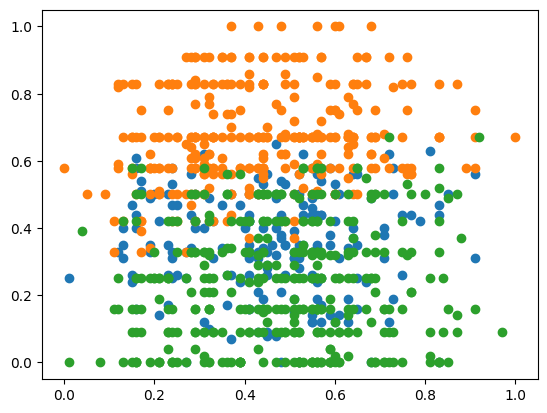

In [31]:
plot_clusters(kmeans.clusters,4,5)

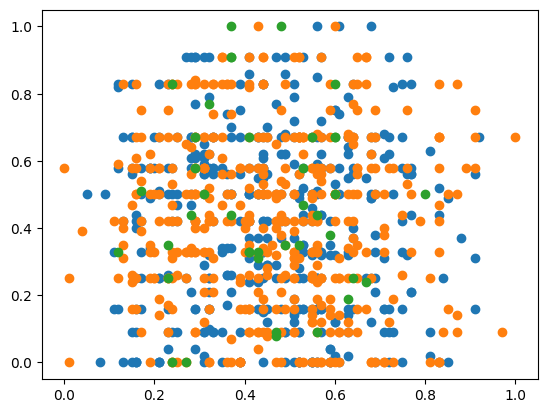

In [32]:
plot_clusters(the_pertect_clusters,4,5)

In [33]:
for i in the_pertect_clusters:
    print(len(i))

402
442
41


In [34]:
sli(kmeans.clusters)

1.058972468603824

In [40]:
dbs = DBSCAN(df_X,eps=1,)

In [41]:
dbs.c

18

In [42]:
sli(dbs.clusters)

4.861041684285838